# Results analysis

In [118]:
%matplotlib inline
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
import collections
from matplotlib.path import Path
import matplotlib.patches as patches
import os.path

In [119]:
# import json file with optimization results
with open('results.json') as json_data:
    res = json.load(json_data)
    
with open('unsolvables.json') as json_data:
    unsolvables = json.load(json_data)

# import json file with optimization results
with open('results_genetic.json') as json_data:
    res_gen = json.load(json_data)

In [46]:
# plot background color
greenHex = '#009848'
# fontsize of the axes title
plt.rc('axes', titlesize='15')
plt.rc('font', size='12')

# Point distribution preview
Check point distribution of some of the instances

In [4]:
def currentRowCol(c,cols,rows):
    if rows == 1 or cols == 1:
        return c,0
    row = math.floor(c/cols)
    col = c-row*cols
    return row,col

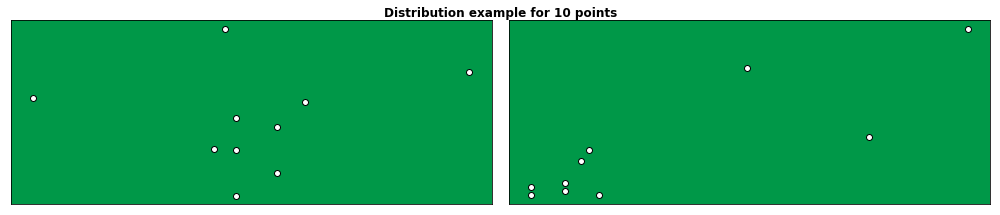

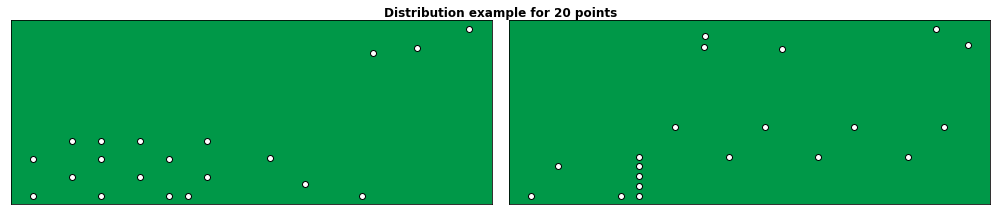

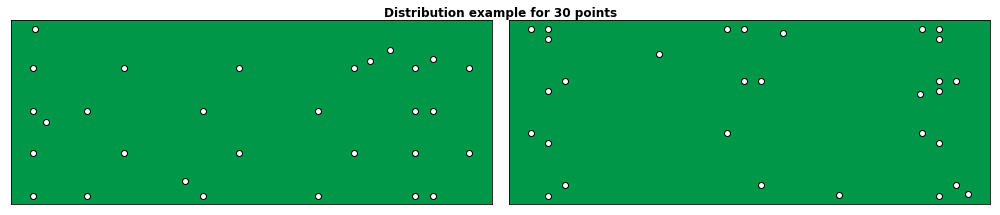

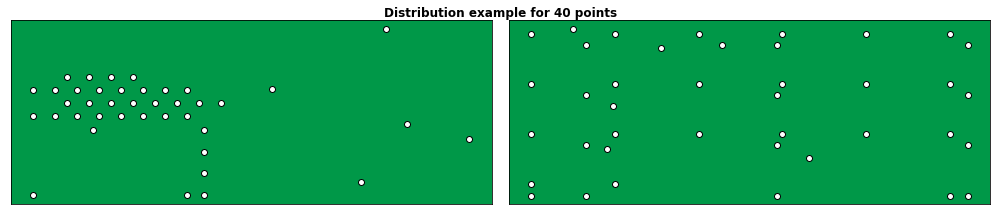

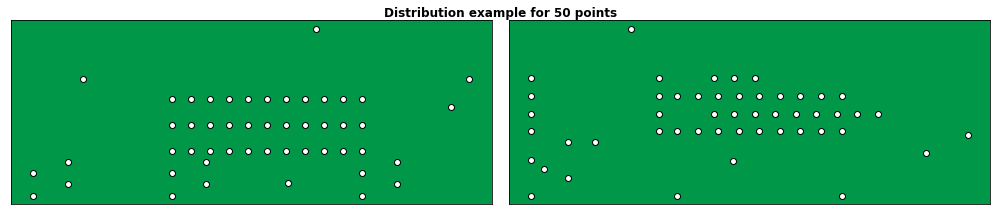

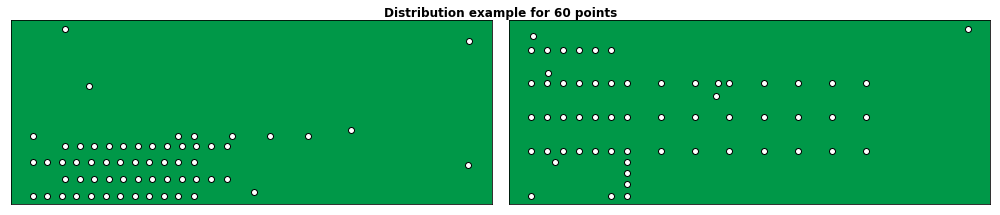

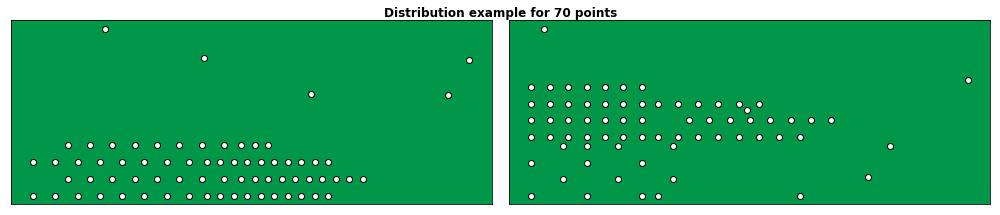

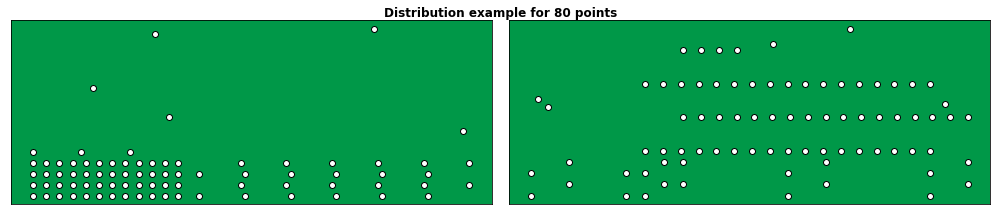

In [5]:
orderedDic = collections.OrderedDict(sorted(res.items()))
for point, val in orderedDic.items():
    
    fig, ax = plt.subplots(1,2,figsize=(14,3))
    fig.suptitle('Distribution example for {} points'.format(point), fontweight='bold')
    # get a random distribution id
    rndId = np.random.randint(1,len(val.keys())+1,2)
    
    count=0
    for distrId in rndId:
        # load point distribution coordinates
        npzfile = np.load('./points/{}/{}.npz'.format(point,distrId))
        xTot = npzfile['xTot']
        yTot = npzfile['yTot']

        # plot
        r,c = currentRowCol(count,1,2)
        _ = ax[r].scatter(xTot, yTot, c='white', edgecolors='black')
        _ = ax[r].set_facecolor(greenHex)
        _ = ax[r].get_xaxis().set_visible(False)
        _ = ax[r].get_yaxis().set_visible(False)
        _ = plt.tight_layout()
        _ = plt.subplots_adjust(top=0.92)
        count+=1
    #fig.savefig('{}-point-sample.pdf'.format(point),bbox_inches='tight')

Text(0.5,1,'Optimal solution for 10 points, distribution #1')

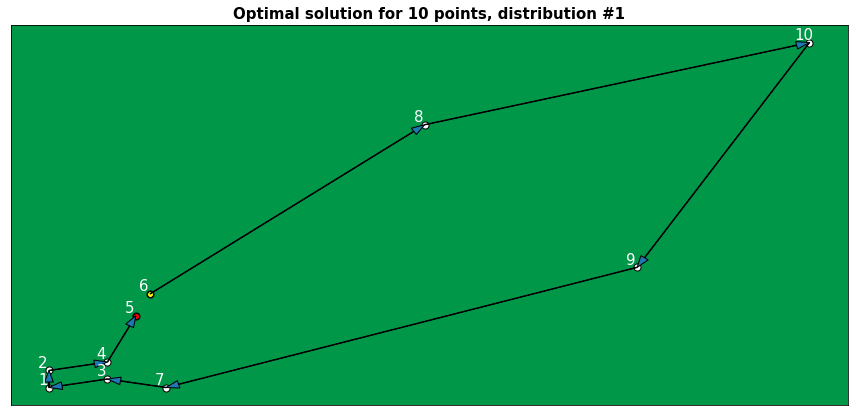

In [6]:
# show an example solution for one point distribution
pointNr = 10
distrId = 1
timeLimit = 9999
fig, ax = plt.subplots(1,1, figsize=(15,7))
out = np.loadtxt('./points/{}/{}_{}_sol.txt'.format(pointNr,distrId,timeLimit), dtype=int)
npzfile = np.load('./points/{}/{}.npz'.format(pointNr,distrId))
xTot = npzfile['xTot']
yTot = npzfile['yTot']

nodesOrder = np.argsort(out[np.where(out == 0, False, True)])[::-1]

firstNode = nodesOrder[0]
lastNode = nodesOrder[-1]

ax.set_facecolor(greenHex)
for i, l in enumerate(xTot):
    ax.annotate(i+1, (xTot[i], yTot[i]), size=15, color='white', textcoords="offset points", xytext=(-6,3), ha='center')
for i in range(len(nodesOrder)-1):
    currNode = nodesOrder[i]
    nextNode = nodesOrder[i+1]
    ax.arrow(xTot[currNode], yTot[currNode],
             xTot[nextNode]-xTot[currNode],
             yTot[nextNode]-yTot[currNode],
             length_includes_head=True, width=0.01,head_width=0.15, head_starts_at_zero=False)
ax.scatter(xTot, yTot, c='white', edgecolors='black', s=50)
ax.scatter(xTot[firstNode], yTot[firstNode], c='yellow', edgecolors='black')
ax.scatter(xTot[lastNode], yTot[lastNode], c='red', edgecolors='black')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Optimal solution for 10 points, distribution #1', fontweight='bold')
#fig.savefig('004-optimal-10-1-points.pdf',bbox_inches='tight')

# Optimization time distribution
Distribution of optimization time when time limit is set to 9999

In [7]:
# collect timings for each data point and each distribution id
# only for the case without time constraint
def getOptimTimes(res):
    optimTime = {}
    pointsNr = 0
    resOrdered = collections.OrderedDict(sorted(res.items()))
    for point, val in resOrdered.items():
        pointsNr += 1
        for distrId, val in val.items():
            optimTime.setdefault(point, [])
            #print(res[point][distrId]['9999'])
            #print(res[point][distrId]['9999']['runningTime[ms]'])
            timeS = round(res[point][distrId]['9999']['runningTime[ms]']/1000,2)
            optimTime[point].append(timeS)
    return optimTime, pointsNr

In [8]:
optimTime, pointsNr = getOptimTimes(res)
optimTimeGen, pointsNrGen = getOptimTimes(res_gen)

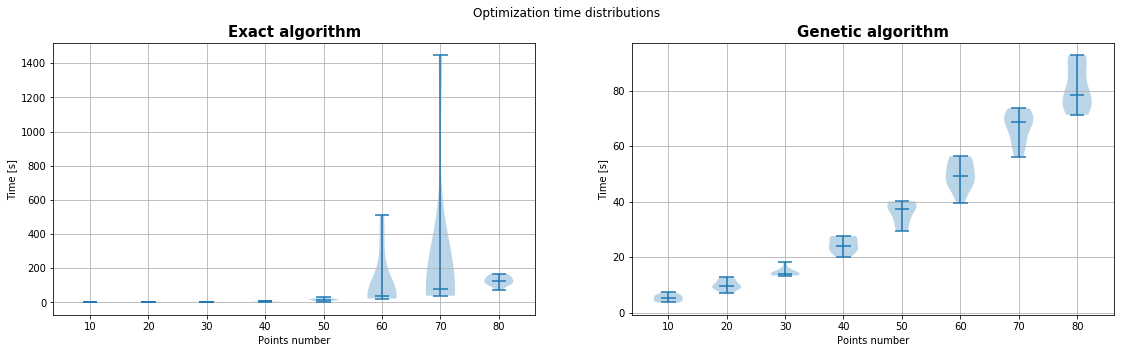

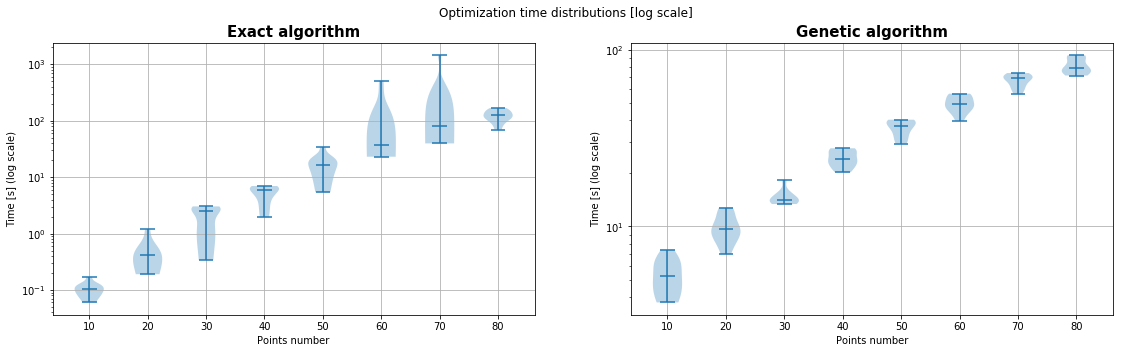

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 5))
fig.suptitle('Optimization time distributions')
# exact algorithm
_ = ax[0].violinplot(list(optimTime.values()),np.arange(pointsNr),showmeans=False,showmedians=True)
_ = ax[0].set_title('Exact algorithm', fontweight='bold')
_ = ax[0].grid(True)
_ = ax[0].set_xticks(np.arange(pointsNr))
_ = ax[0].set_xticklabels(list(optimTime.keys()))
_ = ax[0].set_xlabel('Points number')
_ = ax[0].set_ylabel('Time [s]')

# genetic algorithm
_ = ax[1].violinplot(list(optimTimeGen.values()),np.arange(pointsNrGen),showmeans=False,showmedians=True)
_ = ax[1].set_title('Genetic algorithm', fontweight='bold')
_ = ax[1].grid(True)
_ = ax[1].set_xticks(np.arange(pointsNr))
_ = ax[1].set_xticklabels(list(optimTime.keys()))
_ = ax[1].set_xlabel('Points number')
_ = ax[1].set_ylabel('Time [s]')
#fig.savefig('005a-optimization-time-s.pdf',bbox_inches='tight')

# LOG SCALE
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 5))
fig.suptitle('Optimization time distributions [log scale]')
# exact algorithm
_ = ax[0].violinplot(list(optimTime.values()),np.arange(pointsNr),showmeans=False,showmedians=True)
_ = ax[0].set_title('Exact algorithm', fontweight='bold')
_ = ax[0].set_yscale('log')
_ = ax[0].grid(True)
_ = ax[0].set_xticks(np.arange(pointsNr))
_ = ax[0].set_xticklabels(list(optimTime.keys()))
_ = ax[0].set_xlabel('Points number')
_ = ax[0].set_ylabel('Time [s] (log scale)')

# genetic algorithm
_ = ax[1].violinplot(list(optimTimeGen.values()),np.arange(pointsNrGen),showmeans=False,showmedians=True)
_ = ax[1].set_title('Genetic algorithm', fontweight='bold')
_ = ax[1].set_yscale('log')
_ = ax[1].grid(True)
_ = ax[1].set_xticks(np.arange(pointsNr))
_ = ax[1].set_xticklabels(list(optimTime.keys()))
_ = ax[1].set_xlabel('Points number')
_ = ax[1].set_ylabel('Time [s] (log scale)')
#fig.savefig('005b-optimization-time-logs.pdf',bbox_inches='tight')

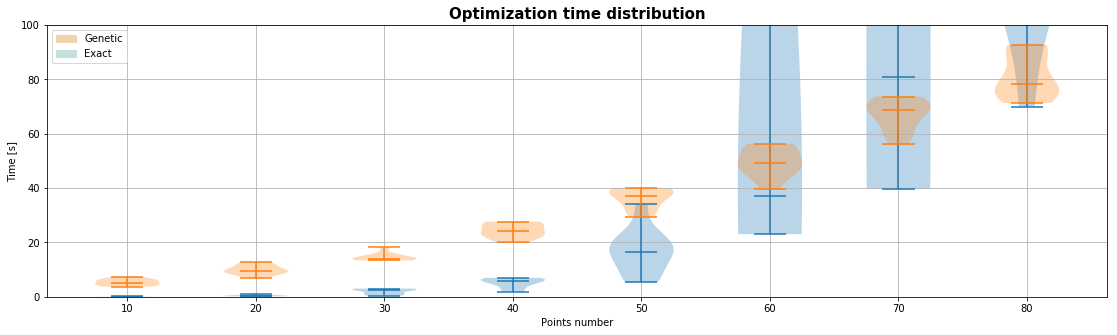

In [29]:
# overlay the two algorithms results for better comparison
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(19, 5))
_ = ax.violinplot(list(optimTime.values()),np.arange(pointsNr),showmeans=False,showmedians=True)
_ = ax.violinplot(list(optimTimeGen.values()),np.arange(pointsNrGen),showmeans=False,showmedians=True)
_ = ax.set_title('Optimization time distribution', fontweight='bold')
_ = ax.grid(True)
_ = ax.set_xticks(np.arange(pointsNr))
_ = ax.set_xticklabels(list(optimTime.keys()))
_ = ax.set_xlabel('Points number')
_ = ax.set_ylabel('Time [s]')
_ = ax.set_ylim([0,100])
_ = ax.legend([patches.Patch(color='#F1D4AF'),patches.Patch(color='#C5E0DC')], ['Genetic','Exact'], loc='upper left')
#fig.savefig('005c-optimization-time-overlap.pdf',bbox_inches='tight')

# Number of unsolved instances

In [31]:
unsolvables = collections.OrderedDict(sorted(unsolvables.items()))
uniqueTimings = set([k for _, vals in unsolvables.items() for k,_ in vals.items()])

In [32]:
unsolvablesCount = {}
for point, val in unsolvables.items():
    for t in uniqueTimings:
        unsolvedNr = 0
        if t in val.keys():
            unsolvedNr = len(unsolvables[point][t])
        unsolvablesCount.setdefault(t, [])
        unsolvablesCount[t].append(unsolvedNr)

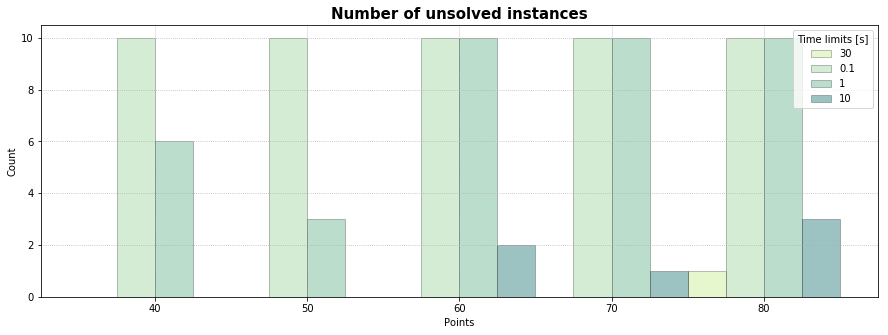

In [35]:
width = 0.25
pos = list(range(len(list(unsolvablesCount.values())[0])))

fig, ax = plt.subplots(1,1,figsize=(15,5))

# plot unsolved solutions
# barplot with multiple bars: groups are the points, each bar is a timelimit
# and y values are the nr of points without solution

colors = ['#CFF09E', '#A8DBA8', '#79BD9A', '#3B8686']
for i, unsolvedCount in enumerate(unsolvablesCount.values()):
    _ = ax.bar([p + width*i for p in pos], 
            unsolvedCount,
            width, 
            alpha=0.5, 
            color=colors[i],
            linewidth=0.5,
            edgecolor='k',
            label=list(unsolvables.keys())[i])

_ = ax.set_xticks([p + 1.5 * width for p in pos])
_ = ax.set_xticklabels(list(unsolvables.keys()))
_ = ax.set_ylabel('Count')
_ = ax.set_xlabel('Points')
_ = ax.set_title('Number of unsolved instances', fontweight='bold')
_ = ax.legend(list(unsolvablesCount.keys()), loc='upper right', title='Time limits [s]')
_ = ax.grid(linestyle='dotted')
#fig.savefig('006-unsolved-instances.pdf',bbox_inches='tight')

# Delta from optimal solution
Distribution of deltas from the optimal solution

In [36]:
def computeDeltas(res, isGenetic=False):
    deltas = {}
    deltasArr = {}
    for point, val in res.items():
        for distrId, val in val.items():
            for timing, val in val.items():
                deltas.setdefault(timing, {})
                deltasArr.setdefault(timing, {'x': [], 'y': []})

                deltas[timing].setdefault(point, [])
                deltas[timing][point].append(val['deltaFromOpt[%]'])

                deltasArr[timing]['x'].append(int(point))
                deltasArr[timing]['y'].append(val['deltaFromOpt[%]'])
                if isGenetic:
                    deltasArr[timing].setdefault('runs', [])
                    deltasArr[timing]['runs'].append(val['runs'])
    return deltas, deltasArr

In [37]:
deltas, deltasArr = computeDeltas(res)
deltasGen, deltasArrGen = computeDeltas(res_gen, isGenetic=True)

In [38]:
def deltaPlot(deltasArr,deltas,i,t,ax,title,col):
    timing = deltasArr[t]
    
    # for genetic algo, check nr of runs
    if col == 0:
        colors = '#AFCC17'
    else:
        # red, yellow, green = 1 run, 2 runs, 3 runs
        baseColors = ['#F06533', '#F2CE3B', '#AFCC17']
        colors = [baseColors[i-1] for i in timing['runs']]
    
    ax[i,col].scatter(timing['x'], timing['y'], color=colors)
    
    # calculate interquantile range
    x = sorted([int(key) for key in deltas[t].keys()])
    yQ = {'0.25':0, '0.5':0, '0.75':0}
    for q in yQ.keys():
        yQ[q] = [np.quantile(deltas[t][point], float(q)) for point in sorted(deltas[t].keys())]
    # plot interquantile ranges
    _ = ax[i,col].plot(x,yQ['0.25'], linestyle='--', color='green')
    _ = ax[i,col].plot(x,yQ['0.75'], linestyle='--', color='green')
    _ = ax[i,col].fill_between(x, yQ['0.25'], yQ['0.75'], where=yQ['0.25'] <= yQ['0.75'], facecolor='green', alpha=0.25)
    # plot median value
    _ = ax[i,col].plot(x,yQ['0.5'], color='k')
    # title and axis labels
    _ = ax[i,col].set_title('Time limit: {} [s]'.format(t), fontweight='bold')
    _ = ax[i,col].set_xticks(x)
    _ = ax[i,col].set_xticklabels(x)
    _ = ax[i,col].set_ylabel('Delta [%]')
    _ = ax[i,col].set_xlabel('Points nr')
    _ = ax[i,col].grid(linestyle='dotted')

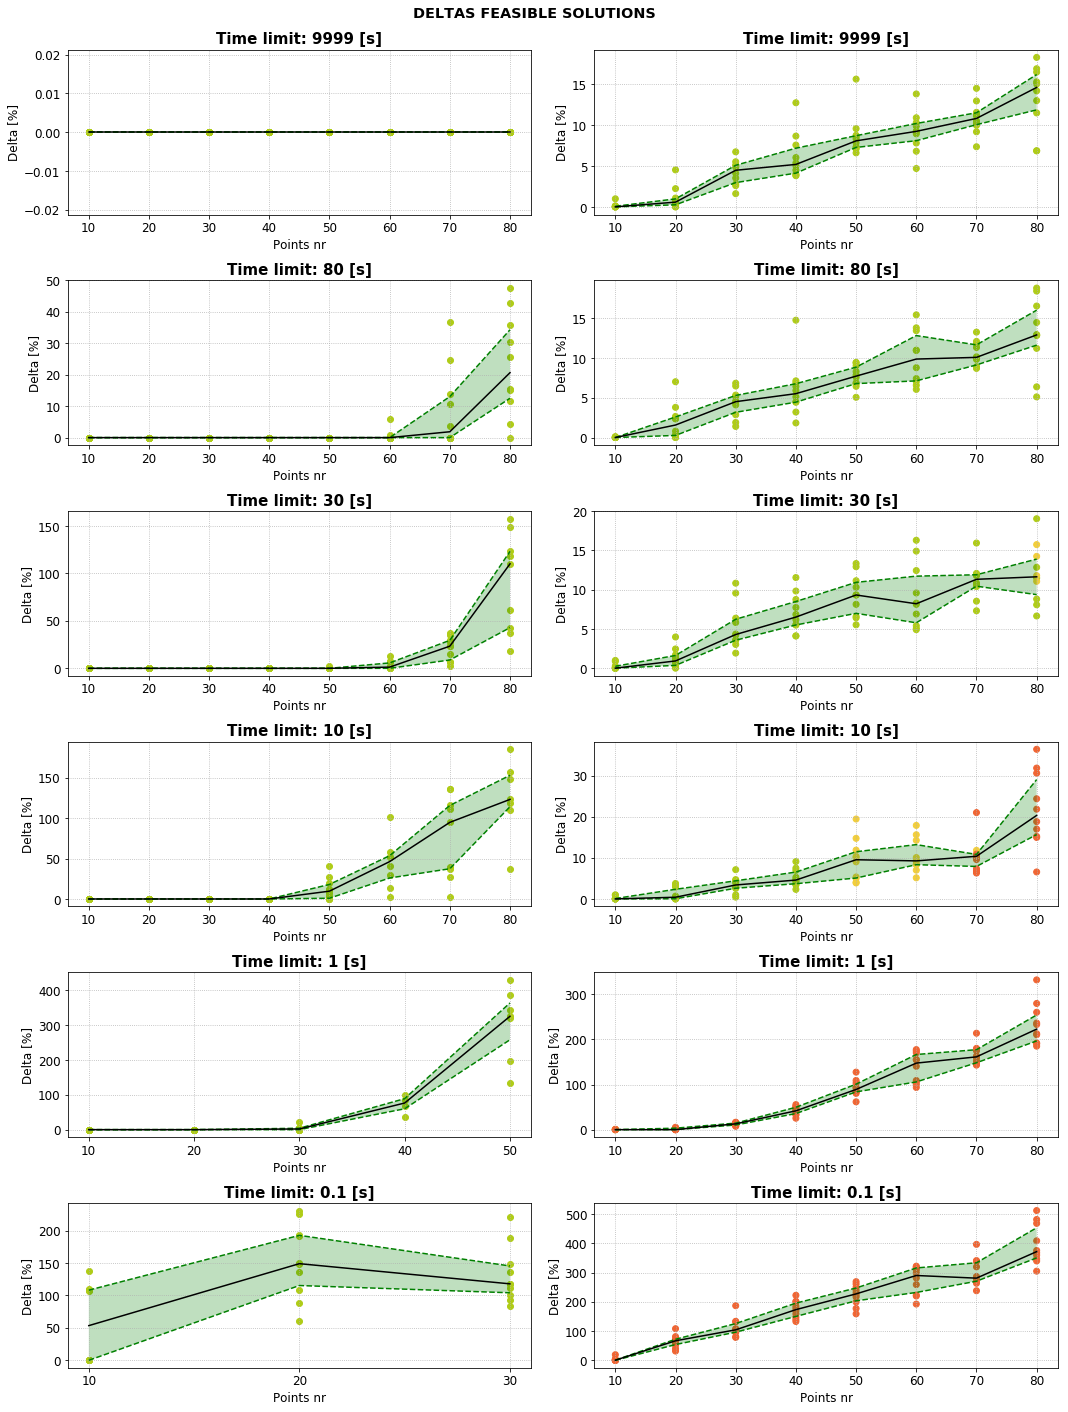

In [48]:
fig, ax = plt.subplots(nrows=len(deltasArr.keys()), ncols=2, figsize=(15, 20))
fig.suptitle('DELTAS FEASIBLE SOLUTIONS', fontweight='bold')

orderedKeys = sorted(deltasArr.keys(), reverse=True)
for i, t in enumerate(orderedKeys):
    
    deltaPlot(deltasArr,deltas,i,t,ax,'titolo',0)
    deltaPlot(deltasArrGen,deltasGen,i,t,ax,'title',1)
    
_ = plt.tight_layout()
_ = plt.subplots_adjust(top=0.95)
#fig.savefig('008-deltas.pdf',bbox_inches='tight')

# Genetic algorithm results reliability
Genetic algorithm should run more than once in order to avoid obtaining good results just by chance, that don't generalise well. Let's check the average amount of times the algorithm run and the mean obj fun value wrt to the minimum.

In [51]:
reliable = {}
x = set()
y = set()
for p in sorted(res_gen.keys()):
    for i in sorted(res_gen[p].keys()):
        for t in sorted(res_gen[p][i].keys()):
            x.add(p)
            y.add(t)
            reliable.setdefault(t, {})
            reliable[t].setdefault(p, [])
            reliable[t][p].append(res_gen[p][i][t]['runs'])

# convert extracted values to dataframe
df = pd.DataFrame(reliable)
df = df.applymap(lambda x: np.round(np.mean(x),2)).fillna(0)
x = df.columns
y = df.index
vals = df.values

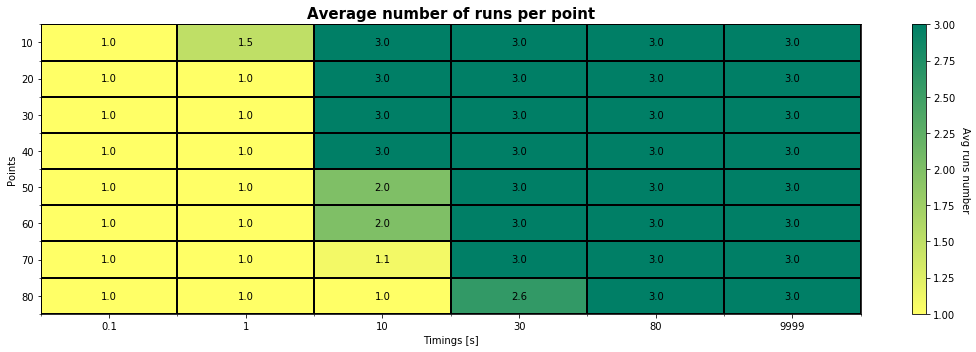

In [80]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
im = ax.imshow(vals, aspect='auto', cmap="summer_r")
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Avg runs number", rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(x)))
ax.set_yticks(np.arange(len(y)))
# ... and label them with the respective list entries
ax.set_xticklabels(x)
ax.set_yticklabels(y)
ax.set_xlabel('Timings [s]')
ax.set_ylabel('Points')

# Loop over data dimensions and create text annotations.
for i in range(len(y)):
    for j in range(len(x)):
        text = ax.text(j, i, vals[i, j], ha="center", va="center", color="k")

ax.set_title("Average number of runs per point", weight='bold')
# Minor ticks, for black separating lines
ax.set_xticks(np.arange(-.5, len(x), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(y), 1), minor=True);
ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
fig.tight_layout()
#fig.savefig('009-avg-runs.pdf',bbox_inches='tight')

# Resolution examples
See graphical resolution path at different time constraints and deltas from optimal solution

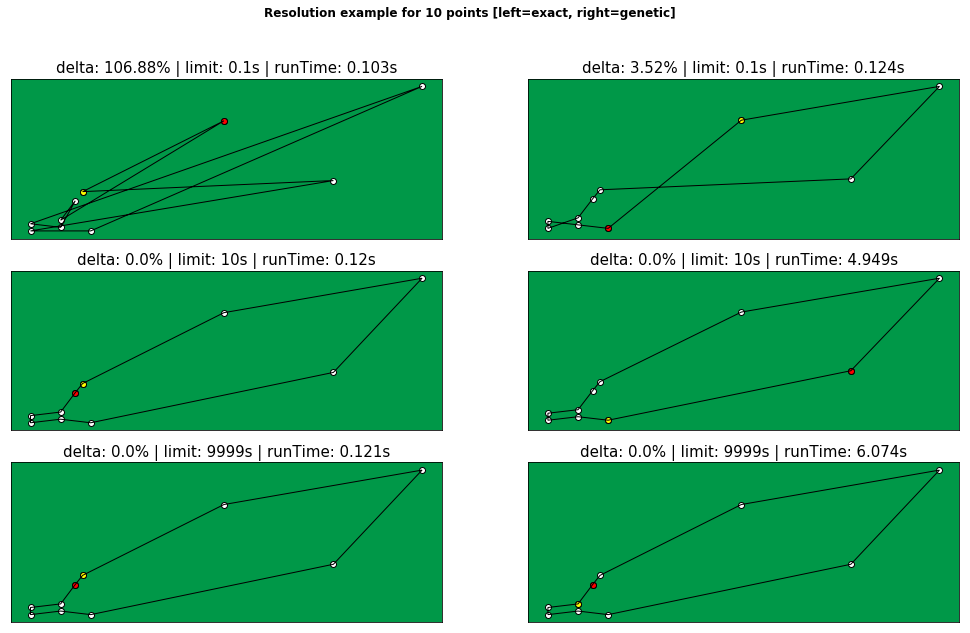

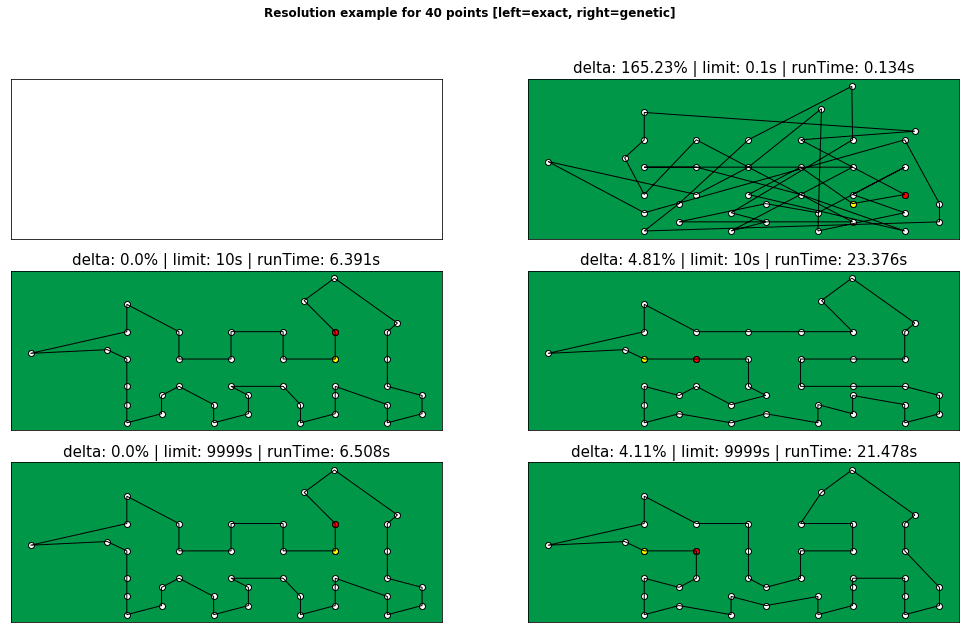

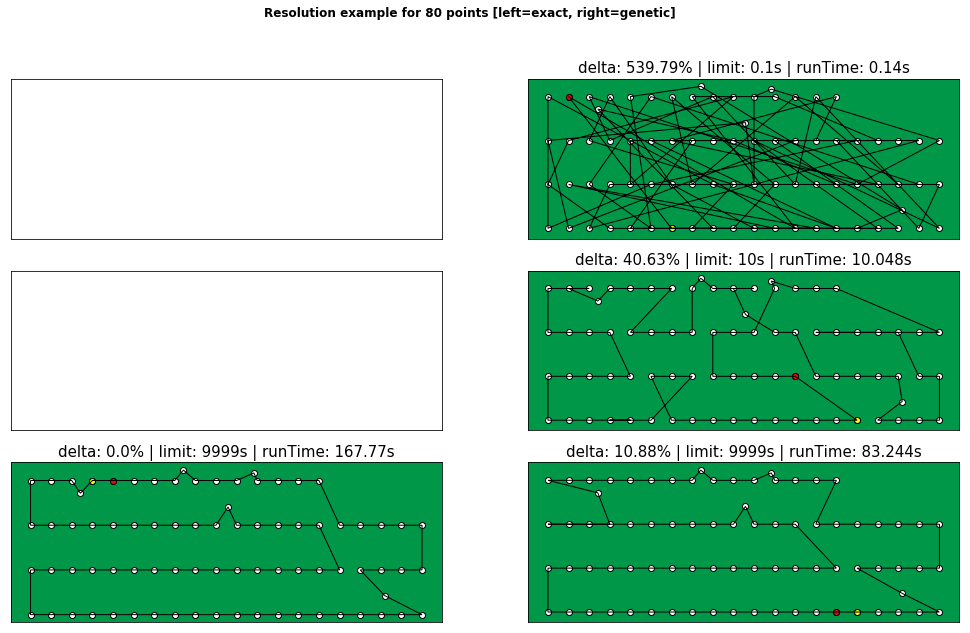

In [125]:
# for each point number show one example of distribution with resolution at different time limits
for point in [10,40,80]:
    point = str(point)
    val = res[point]
    
    cols = 2
    rows = 3
    
    fig, ax = plt.subplots(rows,cols,figsize=(17,10))
    fig.suptitle('Resolution example for {} points [left=exact, right=genetic]'.format(point), fontweight='bold')
    # get a random distribution id
    rndId = str(np.random.randint(1,len(val.keys())+1))
    
    npzfile = np.load('./points/{}/{}.npz'.format(point,rndId))
    xTot = npzfile['xTot']
    yTot = npzfile['yTot']
    
    # loop through timing of that specific distribution id
    r=0
    for timing in [0.1,10,9999]:
        timing = str(timing)
        
        # EXACT APPROACH
        c=0
        # plot points
        # check if solution of the exact method exists, otherwise skip to genetic algo solution
        if timing in res[point][rndId].keys():
            val = res[point][rndId][timing]
            delta = round(val['deltaFromOpt[%]'], 2)
            runningTime = round(val['runningTime[ms]']/1000, 3)
            
            out = np.loadtxt('./points/{}/{}_{}_sol.txt'.format(point,rndId,timing), dtype=int)
            
            # point visiting order
            nodesOrder = np.argsort(out[np.where(out == 0, False, True)])[::-1]
            firstNode = nodesOrder[0]
            lastNode = nodesOrder[-1]
            # points
            ax[r,c].scatter(xTot, yTot, c='white', edgecolors='black')
            ax[r,c].scatter(xTot[firstNode], yTot[firstNode], c='yellow', edgecolors='black')
            ax[r,c].scatter(xTot[lastNode], yTot[lastNode], c='red', edgecolors='black')
            ax[r,c].set_facecolor(greenHex)
            # edges
            verts = [(x,y) for x,y in zip(xTot[nodesOrder],yTot[nodesOrder])]
            verts.append((xTot[firstNode], yTot[firstNode]))
            codes = [Path.MOVETO] + [Path.LINETO]*(len(xTot)-1) + [Path.CLOSEPOLY]
            path = Path(verts,codes)
            patch = patches.PathPatch(path, facecolor='none', lw=1, alpha=1)
            ax[r,c].add_patch(patch)
            # final touches
            ax[r,c].set_title('delta: {}% | limit: {}s | runTime: {}s'.format(delta, timing, runningTime))
        ax[r,c].get_xaxis().set_visible(False)
        ax[r,c].get_yaxis().set_visible(False)
        
        # GENETIC ALGO
        c=1
        val = res_gen[point][rndId][timing]
        delta = round(val['deltaFromOpt[%]'], 2)
        runningTime = round(val['runningTime[ms]']/1000, 3)
        # plot points
        order = np.load('./points/{}/{}_{}_gen_sol.npz'.format(point,rndId,timing))['sol']
        #xTot = xTot[order]
        #yTot = yTot[order]
        # points
        ax[r,c].scatter(xTot, yTot, c='white', edgecolors='black')
        ax[r,c].scatter(xTot[order][0], yTot[order][0], c='yellow', edgecolors='black')
        ax[r,c].scatter(xTot[order][-1], yTot[order][-1], c='red', edgecolors='black')
        ax[r,c].set_facecolor(greenHex)
        # edges
        verts = [(x,y) for x,y in zip(xTot[order],yTot[order])]
        verts.append(verts[0])
        codes = [Path.MOVETO] + [Path.LINETO]*(len(xTot)-1) + [Path.CLOSEPOLY]
        path = Path(verts,codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, alpha=1)
        ax[r,c].add_patch(patch)
        # final touches
        ax[r,c].get_xaxis().set_visible(False)
        ax[r,c].get_yaxis().set_visible(False)
        ax[r,c].set_title('delta: {}% | limit: {}s | runTime: {}s'.format(delta, timing, runningTime))
        r+=1
    #fig.savefig('{}-sol-example.pdf'.format(point),bbox_inches='tight')